In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import jupyter_dash
from jupyter_dash import JupyterDash

In [34]:


# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = JupyterDash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown', options=[
                                    {'label':'All Sites', 'value':'ALL'},
                                    {'label':'CCAFS LC-40','value':'CCAFS LC-40'},
                                    {'label':'VAFB SLC-4E','value':'VAFB SLC-4E'},
                                    {'label':'KSC LC-39A','value':'KSC LC-39A'},
                                    {'label':'CCAFS SLC-40','value':'CCAFS SLC-40'},
                                ],
                                value='ALL',
                                placeholder="Select a Launch Site here",
                                searchable=True
                                ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',min=0,max=10000, step=1000,
                                            marks={0:'0',100:'100'},
                                            value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                html.Br(),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart',component_property='figure'),
    Input(component_id='site-dropdown',component_property='value'))
def get_pie_chart(entered_site):
    filtered_df=spacex_df
    if entered_site=='ALL':
        fig=px.pie(data_frame=spacex_df, values='class',names='Launch Site',title='Total Success Launches by site')
        return fig
    else:
        value_class=spacex_df[spacex_df['Launch Site']==entered_site]['class'].value_counts()
        fig=px.pie(values=value_class,names=value_class.index ,title='Total Success Launches for site '+entered_site)
        return fig   
# TASK 4:

# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart',
    component_property='figure'),
    [
    Input(component_id='site-dropdown',component_property='value'),
    Input(component_id='payload-slider', component_property='value')
    ]
)
def get_scatter_chart(entered_site, payload_mass):
    filtered_df=spacex_df
    if entered_site=='ALL':
        mask=(spacex_df['Payload Mass (kg)']>payload_mass[0]) & (spacex_df['Payload Mass (kg)']<payload_mass[1])
        fig=px.scatter(data_frame=spacex_df[mask], x='Payload Mass (kg)',y='class',color='Booster Version Category',
                       title='Correlation between Payload and Success of all Sites')
        return fig
    else:
        mask=(spacex_df['Payload Mass (kg)']>payload_mass[0]) & (spacex_df['Payload Mass (kg)']<payload_mass[1]) & (spacex_df['Launch Site']==entered_site)
        fig=px.scatter(data_frame=spacex_df[mask], x='Payload Mass (kg)',y='class',color='Booster Version Category',
                       title='Correlation between Payload and Success of all Sites')
        return fig  
# Run the app
if __name__ == '__main__':
    app.run_server(mode='external')


Dash app running on http://127.0.0.1:8050/


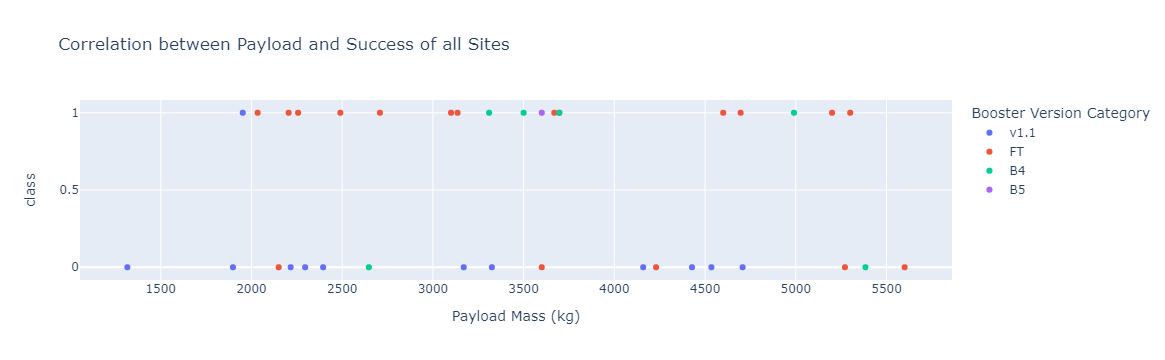

In [32]:
mask=(spacex_df['Payload Mass (kg)']>1000) & (spacex_df['Payload Mass (kg)']<6000)
px.scatter(data_frame=spacex_df[mask], x='Payload Mass (kg)',y='class',color='Booster Version Category',title='Correlation between Payload and Success of all Sites')

In [20]:
spacex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flight Number             56 non-null     int64  
 1   Launch Site               56 non-null     object 
 2   class                     56 non-null     int64  
 3   Payload Mass (kg)         56 non-null     float64
 4   Booster Version           56 non-null     object 
 5   Booster Version Category  56 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.8+ KB


In [2]:
spacex_df = pd.read_csv("spacex_launch_dash.csv")
spacex_df.head()

,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


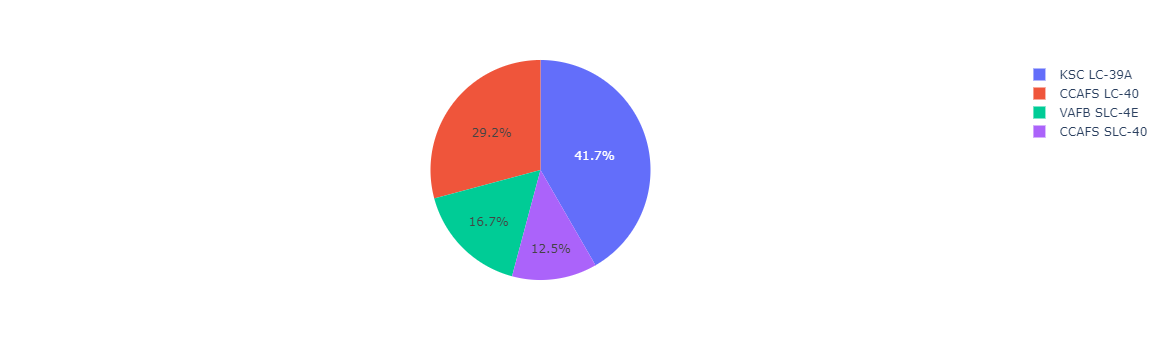

In [5]:
px.pie(data_frame=spacex_df, values='class', names='Launch Site')

In [14]:
sliced_df=spacex_df[spacex_df['Launch Site']=='CCAFS LC-40']
sliced_df['class']=sliced_df['class'].astype(str)
sliced_df.head()

C:\Users\AzazH\AppData\Local\Temp\ipykernel_2140\991561760.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


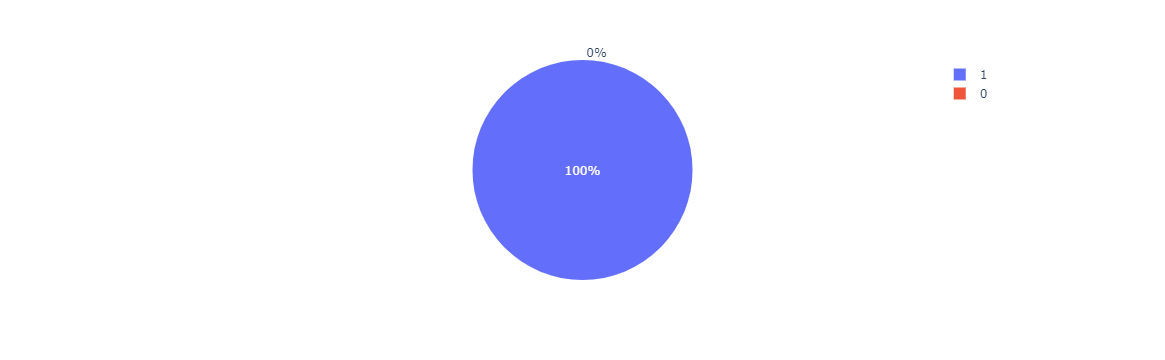

In [15]:
px.pie(data_frame=spacex_df[spacex_df['Launch Site']=='CCAFS LC-40'], values='class', names='class')

In [18]:
values=spacex_df[spacex_df['Launch Site']=='CCAFS LC-40']['class'].value_counts()

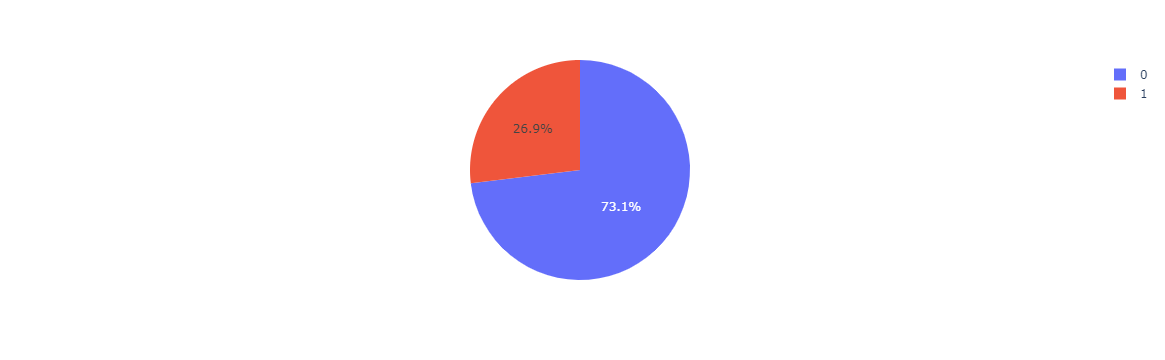

In [24]:
px.pie(values=values, names=values.index)